In [3]:
"""Predicción de Diabetes usando Regresión LogísticaNota: NO utilicé google colab, lo realicé localmente en mi maquina, estoy mas cómodo de esta manera."""

'\nPredicción de Diabetes usando Regresión Logística\nAutores: Odreman Ferrer\n\n'

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [7]:
# Leer el archivo CSV
df = pd.read_csv('data2.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [8]:
# Asignación de atributos y clase

# X será la matriz de atributos (todas las columnas excepto la última)
X = df.iloc[:, :-1].astype(float) 

# Y será el vector de clase (última columna)
y = df.iloc[:, -1]

print("\nPrimeras 10 instancias de X:")
print(X.head(10))

print("\nPrimeras 10 instancias de y:")
print(y.head(10))


Primeras 10 instancias de X:
   preg   plas  pres  skin   insu  mass   pedi   age
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0
5   5.0  116.0  74.0   0.0    0.0  25.6  0.201  30.0
6   3.0   78.0  50.0  32.0   88.0  31.0  0.248  26.0
7  10.0  115.0   0.0   0.0    0.0  35.3  0.134  29.0
8   2.0  197.0  70.0  45.0  543.0  30.5  0.158  53.0
9   8.0  125.0  96.0   0.0    0.0   0.0  0.232  54.0

Primeras 10 instancias de y:
0    tested_positive
1    tested_negative
2    tested_positive
3    tested_negative
4    tested_positive
5    tested_negative
6    tested_positive
7    tested_negative
8    tested_positive
9    tested_positive
Name: class, dtype: object


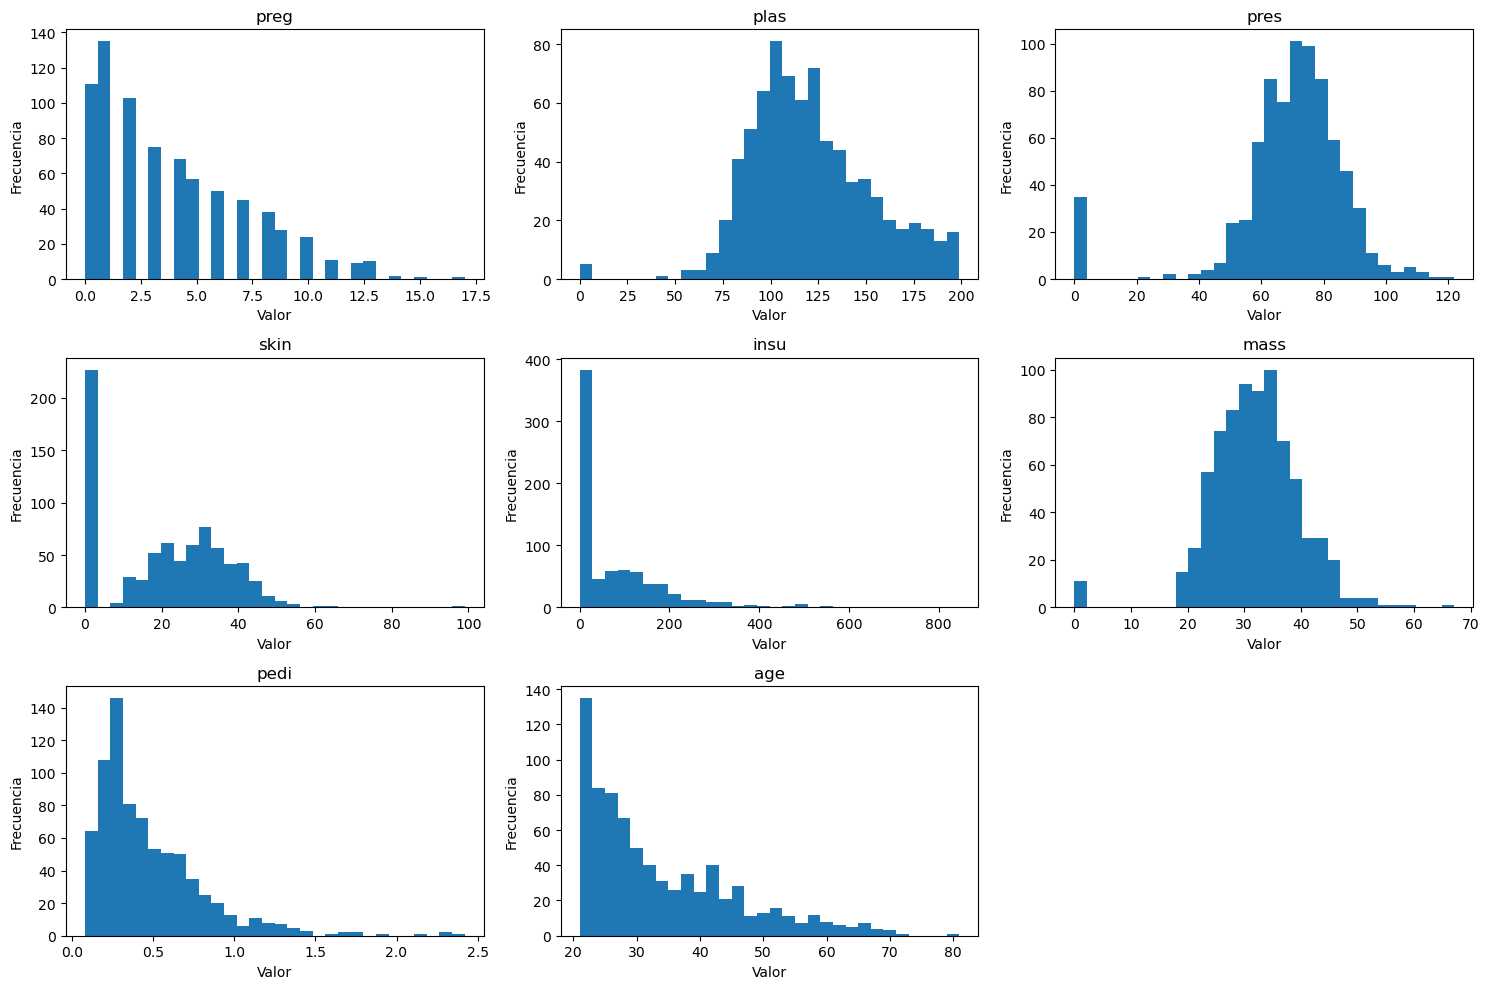

In [9]:
# Análisis de atributos mediante histogramas
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(X[column], bins=30)
    plt.title(column)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [10]:
# Celda 5 - División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Dimensiones de los conjuntos de datos:
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [12]:
# Normalización de datos
# Creamos el escalador
scaler = StandardScaler()
# Ajustamos y transformamos X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transformamos X_test usando los parámetros de X_train
X_test_scaled = scaler.transform(X_test)

print("\nPrimeras 5 filas de X_train normalizado:")
print(X_train_scaled[:5])


Primeras 5 filas de X_train normalizado:
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


In [13]:
# Generación del modelo de regresión logística
# Creamos y entrenamos el modelo
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Coeficientes del modelo:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print("\nIntercept del modelo:", model.intercept_[0])

Coeficientes del modelo:
preg: 0.2126
plas: 1.0713
pres: -0.2478
skin: 0.0457
insu: -0.2008
mass: 0.7782
pedi: 0.2306
age: 0.4212

Intercept del modelo: -0.8861201511656231


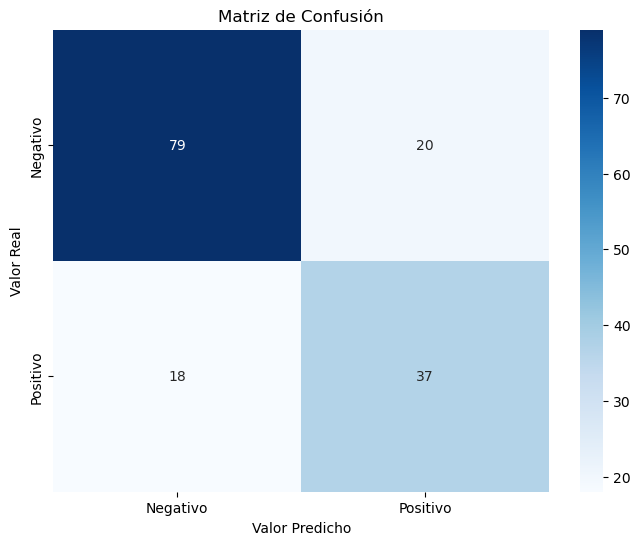

In [14]:
# Evaluación del modelo
# Realizamos predicciones
y_pred = model.predict(X_test_scaled)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()


In [15]:
# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, pos_label='tested_positive')
recall = recall_score(y_test, y_pred, pos_label='tested_positive')
f1 = f1_score(y_test, y_pred, pos_label='tested_positive')

print("\nMétricas de evaluación:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Error Rate: {error_rate:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Métricas de evaluación:
Accuracy: 0.753
Error Rate: 0.247
Precision: 0.649
Recall: 0.673
F1-Score: 0.661


Conclusiones del modelo:

1. La precisión (accuracy) del modelo es de 0.753, lo que significa que acierta en el 75.3% de los casos. 
   Esto indica un rendimiento moderadamente bueno.

2. La tasa de error es de 0.247, lo que implica que se equivoca en el 24.7% de los casos.

3. La precisión (precision) de 0.649 indica que cuando el modelo predice un caso positivo de diabetes, 
   acierta el 64.9% de las veces. Esto sugiere que hay un número moderado de falsos positivos.

4. El recall de 0.673 significa que el modelo identifica correctamente el 67.3% de todos los casos 
   positivos reales de diabetes. Es decir, detecta aproximadamente dos tercios de los casos reales.

5. El F1-Score de 0.661 representa un equilibrio entre precisión y recall, confirmando un rendimiento 
   moderado del modelo.

Observaciones adicionales:
- Los coeficientes del modelo muestran que 'plas' (glucosa en plasma) y 'mass' (índice de masa corporal) 
  son los predictores más importantes con coeficientes de 1.0713 y 0.7782 respectivamente.

- La edad también tiene una influencia moderada (0.4212).

- La presión sanguínea ('pres') y el nivel de insulina ('insu') tienen coeficientes negativos, 
  lo que sugiere una relación inversa con la probabilidad de diabetes.
  
